In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from datetime import date

In [213]:
df = pd.read_csv('C:\\Users\\dell\\Desktop\\Crash_Report.csv')
df

C:\Users\dell\AppData\Local\Temp\ipykernel_4332\256756794.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\dell\\Desktop\\Crash_Report.csv')


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 19:40,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 13:29,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 14:25,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 18:00,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 18:42,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187306,MCP3339004K,240050752,MONTGOMERY,Property Damage Crash,10/23/2024 14:42,County Route,RANDOLPH RD (WB/L),NaN,NaN,NaN,...,Westbound,35,No,No,2004,PONTIAC,VIBE,39.053557,-77.089806,"(39.05355733, -77.08980583)"
187307,MCP32710056,240049869,MONTGOMERY,Property Damage Crash,10/18/2024 14:50,Ramp,RAMP 1 FR RP 4 EB TO DEMOCRACY BLVD,NaN,NaN,NaN,...,NaN,30,No,No,2018,TOYOTA,SIENNA,39.021632,-77.141230,"(39.0216317, -77.14122966)"
187308,MCP3227005X,240051703,MONTGOMERY,Injury Crash,10/28/2024 17:40,County Route,POWDER MILL RD,NaN,NaN,NaN,...,NaN,35,No,No,2011,FORD,FOCUS,39.025225,-76.968726,"(39.02522497, -76.96872566)"
187309,DM8478002V,240050977,TAKOMA,Property Damage Crash,10/24/2024 17:25,Maryland (State) Route,NEW HAMPSHIRE AVE,NEW HAMPSHIRE AVE UNIVERSITY BLVD,NaN,NaN,...,Not On Roadway,15,No,No,2020,FORD,EXPLORER,38.988781,-76.987611,"(38.98878055, -76.9876107)"


# What is the total number of records in the dataset? How many unique agencies have reported crashes?

In [205]:
'The total number of records in the dataset is : ' + df['Report Number'].count().astype(str)

'The total number of records in the dataset is : 187311'

In [206]:
df['Agency Name'].unique()

array(['Takoma Park Police Depart', 'MONTGOMERY',
       'Montgomery County Police', 'Gaithersburg Police Depar',
       'Rockville Police Departme', 'Maryland-National Capital', 'TAKOMA',
       'GAITHERSBURG', 'ROCKVILLE', 'MCPARK'], dtype=object)

# How can we extract just the date from the Crash Date/Time column and create a new column with only dates?

In [207]:
df['Crash Date/Time'].info
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])
df['New_Crash Date/Time'] = df['Crash Date/Time'].dt.date


# How can we filter the dataset to show only crashes that occurred in 2021?

In [208]:
df[df['Crash Date/Time'].dt.year == 2021]

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location,New_Crash Date/Time
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,2021-05-27 19:40:00,NaN,NaN,NaN,IN PARKING LOT,NaN,...,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)",2021-05-27
23,MCP2539001S,210033537,Montgomery County Police,Property Damage Crash,2021-08-27 21:15:00,County,BATTERY LA,KEYSTONE AVE,NaN,NaN,...,25,No,No,0,UNKNOWN,UNKNOWN,38.991944,-77.098018,"(38.99194433, -77.09801817)",2021-08-27
89,MCP209400HS,210041754,Montgomery County Police,Injury Crash,2021-10-18 08:55:00,Other Public Roadway,MONTROSE PKWY,E JEFFERSON ST,NaN,NaN,...,40,No,No,2008,TOYOTA,CELARIS,39.050870,-77.126132,"(39.05087, -77.12613167)",2021-10-18
156,MCP21810046,210041941,Montgomery County Police,Injury Crash,2021-10-19 09:23:00,County,SNOWDEN FARM PKWY,FOREMAN BLVD,NaN,NaN,...,40,No,No,2014,NISSAN,MAXIMA,39.231800,-77.258520,"(39.2318, -77.25852)",2021-10-19
167,MCP2269001G,210036624,Montgomery County Police,Property Damage Crash,2021-09-17 07:44:00,Municipality,FIRSTFIELD RD,CLOPPER RD,NaN,NaN,...,35,No,No,2013,HONDA,CIVIC,39.143331,-77.223766,"(39.14333051, -77.2237657)",2021-09-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172055,DD5604003W,210021021,Rockville Police Departme,Injury Crash,2021-06-03 09:39:00,Maryland (State),W JEFFERSON ST,S WASHINGTON ST,NaN,ROCKVILLE,...,25,No,No,2014,TOYT,4S,39.083237,-77.152792,"(39.08323667, -77.15279217)",2021-06-03
173235,MCP23480062,210035671,Montgomery County Police,Fatal Crash,2021-09-10 20:12:00,US (State),COLUMBIA PIKE,FAIRLAND RD,NaN,NaN,...,50,No,No,2019,TOYOTA,CAMRY,39.073705,-76.955853,"(39.073705, -76.95585333)",2021-09-10
174270,MCP23480062,210035671,Montgomery County Police,Fatal Crash,2021-09-10 20:12:00,US (State),COLUMBIA PIKE,FAIRLAND RD,NaN,NaN,...,50,No,No,2003,SUZU,GSX-R1000,39.073705,-76.955853,"(39.073705, -76.95585333)",2021-09-10
184600,MCP23480064,210048494,Montgomery County Police,Fatal Crash,2021-11-29 19:52:00,County,MIDCOUNTY HWY,SAYBROOKE OAKS BLVD,NaN,GAITHERSBURG,...,50,No,No,2018,HOND,CRV,39.150713,-77.174262,"(39.15071281, -77.17426219)",2021-11-29


# How can we find the most common Vehicle Make and the number of times it appears?

In [209]:
most_common_make = df['Vehicle Make'].value_counts().head(1)
most_common_make

Vehicle Make
TOYOTA    26054
Name: count, dtype: int64

# Which columns have missing values, and what percentage of data is missing for each of these columns?

In [210]:
(df.isnull().sum() / df['Report Number'].count() * 100).sort_values(ascending=False)

Non-Motorist Substance Abuse     97.403783
Related Non-Motorist             96.791966
Off-Road Description             90.768294
Municipality                     89.789174
Circumstance                     81.087603
Driver Substance Abuse           16.720855
Traffic Control                  14.298680
Cross-Street Name                13.560869
Surface Condition                11.499592
Road Name                        10.234316
Route Type                        9.785864
Weather                           7.130387
Drivers License State             6.240424
Vehicle Going Dir                 2.767056
Vehicle Body Type                 1.498043
Parked Vehicle                    0.818959
Light                             0.771444
Driver Distracted By              0.541346
Injury Severity                   0.500238
Vehicle Movement                  0.468739
Collision Type                    0.312315
Vehicle Model                     0.247182
Vehicle Make                      0.224760
Vehicle Dam

# What is the average speed limit recorded in crash reports where a Vehicle Going Dir is specified?

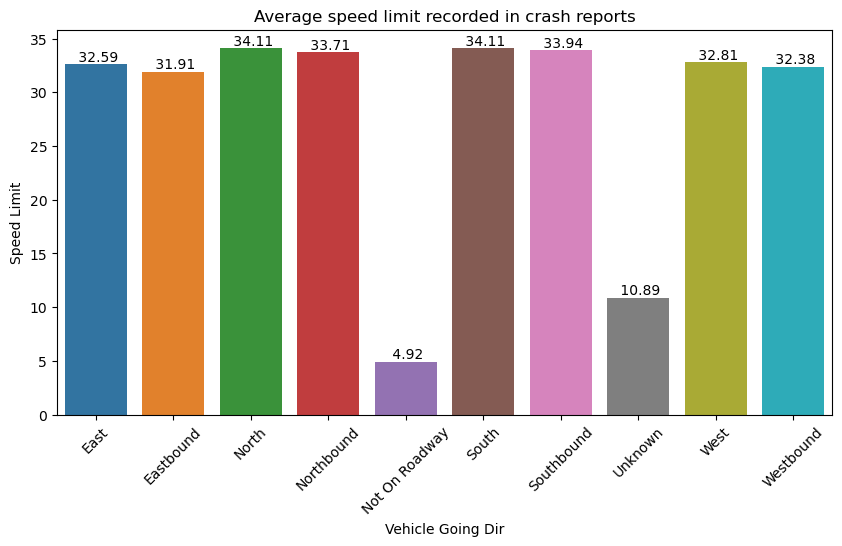

In [211]:
plt.figure(figsize=(10,5))
for_bar = df.groupby(['Vehicle Going Dir'])['Speed Limit'].sum()/df.groupby(['Vehicle Going Dir'])['Speed Limit'].count()
new_df = pd.DataFrame(for_bar).reset_index()
ax = sns.barplot(data = new_df, x = 'Vehicle Going Dir',y = 'Speed Limit')
ax.bar_label(ax.containers[0], fmt=' {:.2f}')
plt.xticks(rotation=45)
plt.title('Average speed limit recorded in crash reports')
plt.show()

# How can we group the data by Agency Name to find the average number of injuries (Injury Severity) per agency?

In [194]:
(df.groupby(['Agency Name'])['Injury Severity'].count()/df['Report Number'].count()*100).sort_values(ascending = False)

Agency Name
Montgomery County Police     73.874999
MONTGOMERY                   12.127958
Rockville Police Departme     5.252761
Gaithersburg Police Depar     4.187154
Takoma Park Police Depart     1.597877
ROCKVILLE                     0.853660
GAITHERSBURG                  0.682288
Maryland-National Capital     0.616622
TAKOMA                        0.211947
MCPARK                        0.094495
Name: Injury Severity, dtype: float64

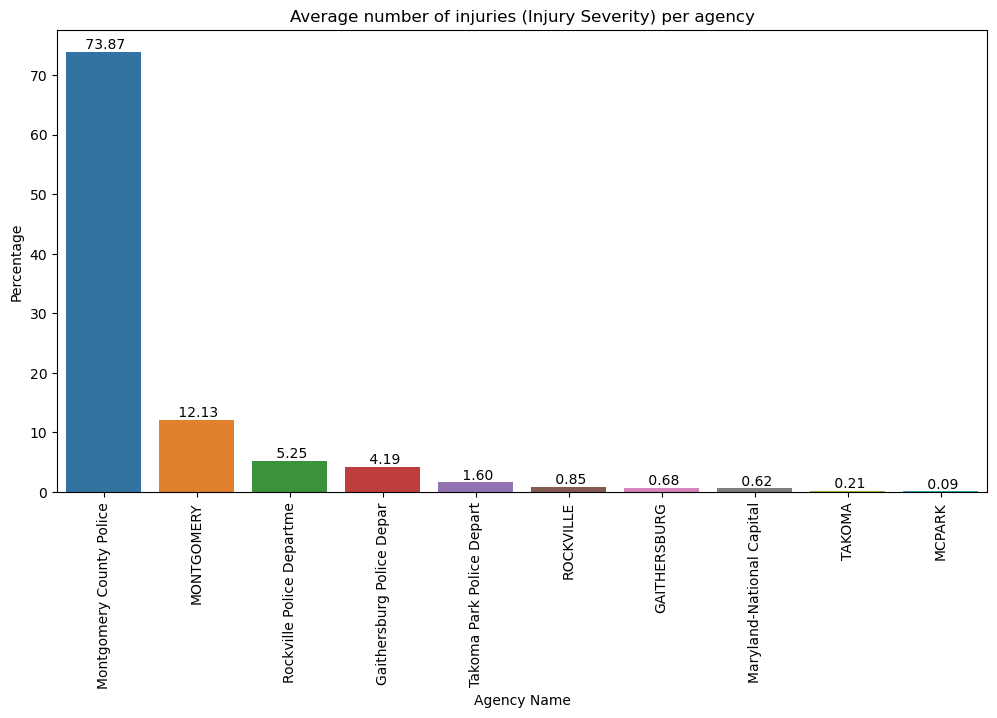

In [245]:
agency_perc = (df.groupby(['Agency Name'])['Injury Severity'].count() / 
                      df['Report Number'].count() * 100).sort_values(ascending=False)

per = pd.DataFrame(agency_perc).reset_index()
filtered_data = per.rename(columns={'Injury Severity':'Percentage'})
plt.figure(figsize = (12,6))
filtered_data_ax = sns.barplot(data = filtered_data, x = filtered_data['Agency Name'], y = filtered_data['Percentage'])
filtered_data_ax.bar_label(filtered_data_ax.containers[0], fmt=' {:.2f}')
plt.title('Average number of injuries (Injury Severity) per agency')
plt.xticks(rotation = 90)
plt.show()